# save DataFrame as HTML and markdown table

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

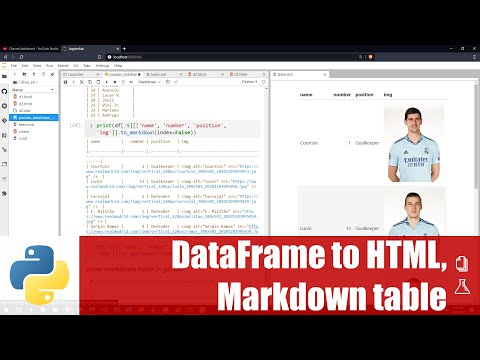

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('I-8iP1fQS80', width=720, height=405)

In [2]:
# conda install beautifulsoup4 lxml requests pillow
import pandas as pd
import requests
from PIL import Image # pillow package (Python Image Library)
import io
import re # regular expression

In [3]:
print(f'pandas version = {pd.__version__}')

pandas version = 1.2.1


In [4]:
pd.Timestamp.today()

Timestamp('2021-02-21 09:55:46.262293')

In [5]:
url='https://github.com/prasertcbs/img/raw/master/realmadrid/realmadrid_team.csv'
df=pd.read_csv(url)
df

,name,number,position,img_url
0,Courtois,1,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...
1,Lunin,13,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...
2,Carvajal,2,Defender,https://www.realmadrid.com//img/vertical_220px...
3,E. Militão,3,Defender,https://www.realmadrid.com//img/vertical_220px...
4,Sergio Ramos,4,Defender,https://www.realmadrid.com//img/vertical_220px...
5,R. Varane,5,Defender,https://www.realmadrid.com//img/vertical_220px...
6,Nacho,6,Defender,https://www.realmadrid.com//img/vertical_220px...
7,Marcelo,12,Defender,https://www.realmadrid.com//img/vertical_220px...
8,Odriozola,19,Defender,https://www.realmadrid.com//img/vertical_220px...
9,F. Mendy,23,Defender,https://www.realmadrid.com//img/vertical_220px...


In [6]:
df.to_html('x.html')

In [7]:
df.to_markdown('x.md')

In [8]:
def to_html_img(url, alt=None):
    '''
    add img tag to image url
    '''
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" />'

In [9]:
df[:3]

,name,number,position,img_url
0,Courtois,1,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...
1,Lunin,13,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...
2,Carvajal,2,Defender,https://www.realmadrid.com//img/vertical_220px...


In [10]:
df['img']=df.apply(lambda r: to_html_img(r['img_url'], r['name']), axis=1)

In [11]:
df

,name,number,position,img_url,img
0,Courtois,1,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Courtois"" src=""https://www.realmadri..."
1,Lunin,13,Goalkeeper,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Lunin"" src=""https://www.realmadrid.c..."
2,Carvajal,2,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Carvajal"" src=""https://www.realmadri..."
3,E. Militão,3,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""E. Militão"" src=""https://www.realmad..."
4,Sergio Ramos,4,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Sergio Ramos"" src=""https://www.realm..."
5,R. Varane,5,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""R. Varane"" src=""https://www.realmadr..."
6,Nacho,6,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Nacho"" src=""https://www.realmadrid.c..."
7,Marcelo,12,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Marcelo"" src=""https://www.realmadrid..."
8,Odriozola,19,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""Odriozola"" src=""https://www.realmadr..."
9,F. Mendy,23,Defender,https://www.realmadrid.com//img/vertical_220px...,"<img alt=""F. Mendy"" src=""https://www.realmadri..."


## to_html table

In [12]:
df[:5][['name', 'number', 'position', 'img']].to_html('d1.html', index=False)

In [13]:
from IPython.display import HTML

In [14]:
df[:5][['name', 'number', 'position', 'img']].to_html(escape=False, index=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>name</th>\n      <th>number</th>\n      <th>position</th>\n      <th>img</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Courtois</td>\n      <td>1</td>\n      <td>Goalkeeper</td>\n      <td><img alt="Courtois" src="https://www.realmadrid.com//img/vertical_220px/courtois_380x501_20201203095853.jpg" /></td>\n    </tr>\n    <tr>\n      <td>Lunin</td>\n      <td>13</td>\n      <td>Goalkeeper</td>\n      <td><img alt="Lunin" src="https://www.realmadrid.com//img/vertical_220px/lunin_380x501_20201203095858.jpg" /></td>\n    </tr>\n    <tr>\n      <td>Carvajal</td>\n      <td>2</td>\n      <td>Defender</td>\n      <td><img alt="Carvajal" src="https://www.realmadrid.com//img/vertical_220px/carvajal_380x501_20201203095829.jpg" /></td>\n    </tr>\n    <tr>\n      <td>E. Militão</td>\n      <td>3</td>\n      <td>Defender</td>\n      <td><img alt="E. Militão" src="https://www.realmadrid.com

In [15]:
df[:5][['name', 'number', 'position', 'img']].to_html(escape=True, index=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>name</th>\n      <th>number</th>\n      <th>position</th>\n      <th>img</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Courtois</td>\n      <td>1</td>\n      <td>Goalkeeper</td>\n      <td>&lt;img alt="Courtois" src="https://www.realmadrid.com//img/vertical_220px/courtois_380x501_20201203095853.jpg" /&gt;</td>\n    </tr>\n    <tr>\n      <td>Lunin</td>\n      <td>13</td>\n      <td>Goalkeeper</td>\n      <td>&lt;img alt="Lunin" src="https://www.realmadrid.com//img/vertical_220px/lunin_380x501_20201203095858.jpg" /&gt;</td>\n    </tr>\n    <tr>\n      <td>Carvajal</td>\n      <td>2</td>\n      <td>Defender</td>\n      <td>&lt;img alt="Carvajal" src="https://www.realmadrid.com//img/vertical_220px/carvajal_380x501_20201203095829.jpg" /&gt;</td>\n    </tr>\n    <tr>\n      <td>E. Militão</td>\n      <td>3</td>\n      <td>Defender</td>\n      <td>&lt;img alt="E. Militão" src="https

In [16]:
HTML(df[:5][['name', 'number', 'position', 'img']].to_html(escape=True, index=False))

name,number,position,img
Courtois,1,Goalkeeper,"<img alt=""Courtois"" src=""https://www.realmadrid.com//img/vertical_220px/courtois_380x501_20201203095853.jpg"" />"
Lunin,13,Goalkeeper,"<img alt=""Lunin"" src=""https://www.realmadrid.com//img/vertical_220px/lunin_380x501_20201203095858.jpg"" />"
Carvajal,2,Defender,"<img alt=""Carvajal"" src=""https://www.realmadrid.com//img/vertical_220px/carvajal_380x501_20201203095829.jpg"" />"
E. Militão,3,Defender,"<img alt=""E. Militão"" src=""https://www.realmadrid.com//img/vertical_220px/militao_380x501_20201203095858.jpg"" />"
Sergio Ramos,4,Defender,"<img alt=""Sergio Ramos"" src=""https://www.realmadrid.com//img/vertical_220px/ramos_380x501_20201203095830.jpg"" />"


In [17]:
HTML(df[:5][['name', 'number', 'position', 'img']].to_html(escape=False, index=False))

name,number,position,img
Courtois,1,Goalkeeper,
Lunin,13,Goalkeeper,
Carvajal,2,Defender,
E. Militão,3,Defender,
Sergio Ramos,4,Defender,


In [18]:
df[:5][['name', 'number', 'position', 'img']].to_html('d2.html', escape=False, index=False)

### open d2.html with Excel

## to_markdown table
```
conda install tabulate
```

In [19]:
df['name']

0         Courtois
1            Lunin
2         Carvajal
3       E. Militão
4     Sergio Ramos
5        R. Varane
6            Nacho
7          Marcelo
8        Odriozola
9         F. Mendy
10           Kroos
11          Modrić
12        Casemiro
13        Valverde
14        Ødegaard
15            Isco
16         Hazard 
17         Benzema
18         Asensio
19        Lucas V.
20           Jović
21        Vini Jr.
22         Mariano
23         Rodrygo
Name: name, dtype: object

In [20]:
df['name'].to_markdown()

'|    | name         |\n|---:|:-------------|\n|  0 | Courtois     |\n|  1 | Lunin        |\n|  2 | Carvajal     |\n|  3 | E. Militão   |\n|  4 | Sergio Ramos |\n|  5 | R. Varane    |\n|  6 | Nacho        |\n|  7 | Marcelo      |\n|  8 | Odriozola    |\n|  9 | F. Mendy     |\n| 10 | Kroos        |\n| 11 | Modrić       |\n| 12 | Casemiro     |\n| 13 | Valverde     |\n| 14 | Ødegaard     |\n| 15 | Isco         |\n| 16 | Hazard       |\n| 17 | Benzema      |\n| 18 | Asensio      |\n| 19 | Lucas V.     |\n| 20 | Jović        |\n| 21 | Vini Jr.     |\n| 22 | Mariano      |\n| 23 | Rodrygo      |'

In [21]:
print(df['name'].to_markdown())

|    | name         |
|---:|:-------------|
|  0 | Courtois     |
|  1 | Lunin        |
|  2 | Carvajal     |
|  3 | E. Militão   |
|  4 | Sergio Ramos |
|  5 | R. Varane    |
|  6 | Nacho        |
|  7 | Marcelo      |
|  8 | Odriozola    |
|  9 | F. Mendy     |
| 10 | Kroos        |
| 11 | Modrić       |
| 12 | Casemiro     |
| 13 | Valverde     |
| 14 | Ødegaard     |
| 15 | Isco         |
| 16 | Hazard       |
| 17 | Benzema      |
| 18 | Asensio      |
| 19 | Lucas V.     |
| 20 | Jović        |
| 21 | Vini Jr.     |
| 22 | Mariano      |
| 23 | Rodrygo      |


In [22]:
print(df[:5][['name', 'number', 'position', 'img']].to_markdown(index=False))

| name         |   number | position   | img                                                                                                              |
|:-------------|---------:|:-----------|:-----------------------------------------------------------------------------------------------------------------|
| Courtois     |        1 | Goalkeeper | <img alt="Courtois" src="https://www.realmadrid.com//img/vertical_220px/courtois_380x501_20201203095853.jpg" />  |
| Lunin        |       13 | Goalkeeper | <img alt="Lunin" src="https://www.realmadrid.com//img/vertical_220px/lunin_380x501_20201203095858.jpg" />        |
| Carvajal     |        2 | Defender   | <img alt="Carvajal" src="https://www.realmadrid.com//img/vertical_220px/carvajal_380x501_20201203095829.jpg" />  |
| E. Militão   |        3 | Defender   | <img alt="E. Militão" src="https://www.realmadrid.com//img/vertical_220px/militao_380x501_20201203095858.jpg" /> |
| Sergio Ramos |        4 | Defender   | <img alt="Sergio Ramos"

In [23]:
df[:5][['name', 'number', 'position', 'img']].to_markdown('team.md', index=False)

### show markdown table in github
* https://github.com/prasertcbs/test/blob/master/team.md